#### CS166 Pre-class Work for Session 11.1

### Ising Model

_Yoav Rabinovich, March 2019_

_____________

*Implement a simulation of the Ising model.*

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class IsingSim():
    
    def __init__(self,size=10):
        
        self.size = size
        self.randomize()
        
    def randomize(self):
        self.state = np.random.choice([1,-1],(self.size,self.size))
        
    def step(self,T):
        
        i, j = np.random.choice(range(self.size), 2)
        neighbors = [self.state[(i-1)%self.size, j],
					 self.state[i, (j-1)%self.size],
					 self.state[(i+1)%self.size, j],
					 self.state[i, (j+1)%self.size]]
        
        E = -1*self.state[i,j]*sum(neighbors)
        
        if np.random.random() < min(1,np.exp(2*E/T)):
            self.state[i,j] = -1*self.state[i,j]
            
    def simulate(self,T,runs,steps):
        
        avg_mags = []
        for r in range(runs):
            self.randomize()
            for s in range(steps):
                self.step(T)
            avg_mag = sum(sum(self.state))/(self.size**2)
            avg_mags.append(avg_mag)
        
        return avg_mags

*Run and observe the state of your simulation for temperatures T = 1, 2, 3, 4, 5. For each of the T values above, plot a histogram over the average magnetization of the final state*

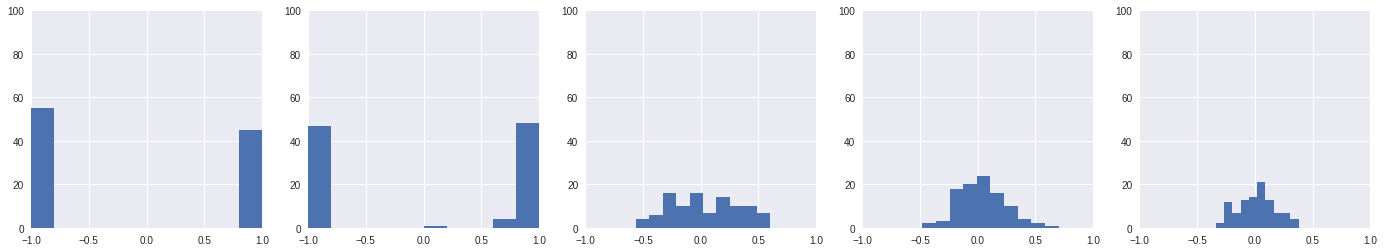

In [12]:
size=10
runs=100
steps=100000

plt.figure(figsize=(24,4))
plt.title("Histograms of Final Average Magnetization for T=1,2,3,4,5")

sim = IsingSim(size)
for temp in range(1,6):
    results = sim.simulate(temp,runs,steps)
    plt.subplot(1,5,temp)
    plt.xlim(-1,1)
    plt.ylim(0,runs)
    plt.hist(results)
    
plt.show()